<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/IBMEC8_ArvDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arvore Decisao**

In [1]:
 '!pip install graphviz'

'!pip install graphviz'

In [2]:
#!apt-get install graphviz

In [3]:
import pandas as pd
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/JogarVolei%20-%20OKK%20-%20Tr.csv')
treino.head()

,previsao,temperatura,umidade,vento,jogar
0,1,1,1,0,0
1,1,1,1,1,0
2,0,1,1,0,1
3,-1,0,1,0,1
4,-1,-1,0,0,1


In [4]:
from sklearn.tree import DecisionTreeClassifier

arv = DecisionTreeClassifier(max_depth=2)
arv.fit(treino[['temperatura',	'umidade',	'vento',	'previsao']] , treino['jogar'])
acuracia_treino = arv.score(treino[['temperatura',	'umidade',	'vento',	'previsao']] , treino['jogar'])
acuracia_treino*100

85.71428571428571

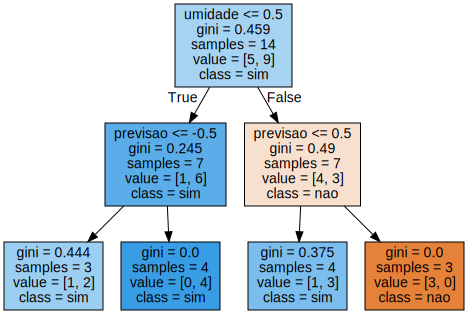

In [5]:
from sklearn.tree import export_graphviz
from graphviz import Source

dot_data = export_graphviz(arv,filled=True,
                           feature_names=['temperatura',	'umidade',	'vento',	'previsao'], 
                           class_names=['nao','sim'])

grafico = Source(dot_data)
grafico

In [6]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/JogarVolei%20-%20OKK%20-%20Ts.csv')
teste  

,previsao,temperatura,umidade,vento,jogar
0,1,1,1,0,0
1,1,1,1,1,0
2,0,1,1,0,1
3,-1,0,1,0,1
4,-1,-1,0,0,0
5,-1,-1,0,1,1


In [7]:
prev_teste = arv.predict(teste[['temperatura',	'umidade',	'vento',	'previsao']])
prev_teste

array([0, 0, 1, 1, 1, 1])

In [8]:
y_teste = teste['jogar']
y_teste

0    0
1    0
2    1
3    1
4    0
5    1
Name: jogar, dtype: int64

In [9]:
from sklearn.metrics import accuracy_score
acuracia_teste = accuracy_score(y_teste,prev_teste)
acuracia_teste *100

83.33333333333334

[[2 1]
 [0 3]]


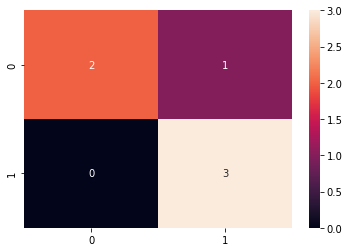

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste , prev_teste)
print(cm)
sns.heatmap(cm, annot=True)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_teste , prev_teste))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



**Exercicio Arvore Decisao**



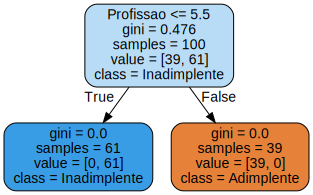

In [12]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier

train = pd.read_csv('http://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
arv = DecisionTreeClassifier(max_depth=2)
arv.fit(train[['Genero','GrauEscolaridade','Profissao','Renda']], train['Inadimplente'])

from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz(arv, out_file=None,
                           filled = True, rounded = True,
                           feature_names = ['Genero','GrauEscolaridade','Profissao','Renda'],
                          class_names = ["Adimplente", "Inadimplente"])
grafico = Source(dot_data)
grafico